# Running WaterTAP3 - Tutorial

Full installation instructions for WaterTAP3 are avaiable in the model documentation. This tutorial assumes that you have done the following:
1. Cloned the repo: 
    * ```git clone https://github.com/NREL/NAWI-WaterTAP3```


2. Installed ```watertap3``` an editable package: 
    * ```python –m pip install –e .```


3. Created and activated the ```watertap3``` environment:
    * ```conda env create --file watertap3.yml```
    * ```conda activate watertap3```



### 1. Navigate to correct directory

In order to run WaterTAP3, you must be in the watertap3 directory that contains ```__init__.py```. This notebook is in the correct directory on the GitHub repo; if you haven't moved it, then you are already in the correct directory.

In [1]:
# %cd /path_to_watertap3

### 2. Import necessary packages

In [2]:
from watertap3.utils import watertap_setup, get_case_study, run_water_tap, run_water_tap_ro, show_train2, get_fixed_onm_reduction, run_sensitivity, run_sensitivity_power, get_results_table
import pandas as pd
import numpy as np

### 3. Enter case study information

For running a treatment train from the input sheet (```treatment_train_setup.xlsx```) enter the following information in this cell:

1. ```case_study```: name of case study to be run (Column A)
2. ```scenario```: scenario for case study to be run (Column B)
3. ```desired_recovery```: default is 1 (for desired recovery of 100%), can be any number between 0-1


In [6]:
case_study = 'san_luis'
scenario = 'stage_1p5mgd_nano'
desired_recovery = 1

# case_study = 'carlsbad'
# scenario = 'baseline'
# desired_recovery = 0.5

# case_study = 'cherokee'
# scenario = 'zld_ct'
# desired_recovery = 1

# case_study = 'heap_leaching'
# scenario = 'baseline'
# desired_recovery = 1

### 4. Setup WaterTAP3 Model

In [7]:
m = watertap_setup(case_study=case_study, scenario=scenario)
m = get_case_study(m=m)

SAN LUIS: STAGE 1P5MGD NANO

------- Adding Unit Processes -------
FEED WATER TANK
DRAINAGE SUMP PUMP1
DRAINAGE SUMP PUMP2
RAW WATER PUMP1
RAW WATER PUMP2
SODIUM HYPOCHLORITE 1
MOLASSES ADDITION
GLYCERIN ADDITION
HYDROCHLORIC ACID ADDITION 1
BIOREACTOR FEED PUMP
BIOREACTOR FEED PUMP 2
ABMET INTERSTAGE PUMP
ABMET INTERSTAGE PUMP 2
ABMET INTERMEDIATE PUMP
ABMET INTERMEDIATE PUMP 2
BIOREACTOR
BIOREACTOR EFFLUENT PUMP
BIOREACTOR EFFLUENT PUMP 2
BIOREACTOR BW PUMP
CLARIFIER
CLARIFIER 2
FILTER PRESS
SODIUM HYPOCHLORITE 2
NANO FEED PUMP
NANO FILTRATION
HYDROCHLORIC ACID ADDITION 2
SODIUM BISULFITE ADDITION
ANTI SCALANT ADDITION
LP TRANSFER PUMP
REVERSE OSMOSIS A
PH ADJUSTMENT
LP TRANSFER PUMP 2
REVERSE OSMOSIS B
AGRICULTURE
SMP
-------------------------------------



In [ ]:
m.fs.irrigation_and_drainage.display()

In [ ]:
m.fs.irrigation_and_drainage.display()

In [ ]:
m.fs.irrigation_and_drainage.display()

In [ ]:
m.fs.source_df

In [ ]:
m.fs.reverse_osmosis_a.config.property_package.display()

In [14]:
import seaborn as sns

In [12]:
scenarios = ['baseline', 'stage_1p5mgd', 'stage_1p5mgd_edr']
all_results = pd.DataFrame()
for scenario in scenarios:
    temp = pd.read_csv(f'results/san_luis_{scenario}_test_5.csv')
    all_results = all_results.append(temp)

ValueError: The following variable cannot be assigned with wide-form data: `hue`

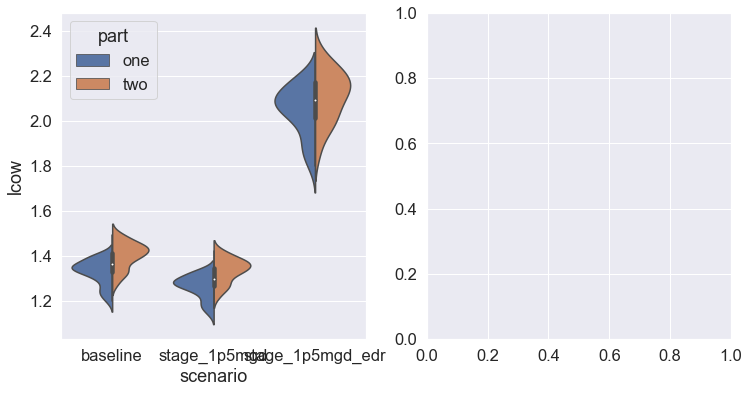

In [23]:
palette = 'dark'
s = 40
sns.set_context('poster')
sns.set_theme()
sns.set(font_scale=1.5)
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.violinplot(data=all_results, x='scenario', y='lcow', hue='part', split=True, ax=ax0)
# sns.histplot(data=all_results, x='scenario', kde=True, ax=ax1, y='lcow')
sns.histplot(all_results.lcow, hue='scenario')
# fig, ax1 = plt.subplots(figsize=(15, 6))

In [16]:
from watertap3.utils import watertap_setup, get_case_study, run_water_tap, run_model, run_water_tap_ro, show_train2, get_fixed_onm_reduction, run_sensitivity, run_sensitivity_power, get_results_table
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pyomo.environ import units as u
from pyomo.environ import Block, Var, value
import pyomo.util.infeasible as infeas
from IPython.display import clear_output
import itertools

In [ ]:
m.fs.source_constituents

### 5. Run WaterTAP3

In [8]:
m = run_water_tap_ro(m, desired_recovery=desired_recovery, scenario_name=scenario, ro_bounds='seawater')

Case Study = SAN LUIS
Scenario = STAGE 1P5MGD NANO
----------------------------------------------------------------------

Degrees of Freedom: 4

WaterTAP3 solution optimal 

----------------------------------------------------------------------
----------------------------------------------------------------------

Degrees of Freedom: 4

WaterTAP3 solution optimal 

----------------------------------------------------------------------
SAN LUIS: STAGE 1P5MGD NANO

------- Adding Unit Processes -------
FEED WATER TANK
DRAINAGE SUMP PUMP1
DRAINAGE SUMP PUMP2
RAW WATER PUMP1
RAW WATER PUMP2
SODIUM HYPOCHLORITE 1
MOLASSES ADDITION
GLYCERIN ADDITION
HYDROCHLORIC ACID ADDITION 1
BIOREACTOR FEED PUMP
BIOREACTOR FEED PUMP 2
ABMET INTERSTAGE PUMP
ABMET INTERSTAGE PUMP 2
ABMET INTERMEDIATE PUMP
ABMET INTERMEDIATE PUMP 2
BIOREACTOR
BIOREACTOR EFFLUENT PUMP
BIOREACTOR EFFLUENT PUMP 2
BIOREACTOR BW PUMP
CLARIFIER
CLARIFIER 2
FILTER PRESS
SODIUM HYPOCHLORITE 2
NANO FEED PUMP
NANO FILTRATION
HYDROCH

In [ ]:
((28.8 + 7.8 + 2.3 ) / (8 * 70) * 1E6) * 1.190128

In [ ]:
m.fs.ion_exchange.tds_in()

In [ ]:
m.fs.reverse_osmosis.conc_mass_waste[0, 'tds']()

In [ ]:
len('===========================UNIT PROCESS RESULTS===========================')

In [ ]:
water_type = 'irrigation_and_drainage'
reference = 'nawi'
scenario = 'stage_1p5mgd'
input_file = 'data/case_study_water_sources.csv'
source_df = pd.read_csv(input_file, index_col='variable')
source_df = source_df[((source_df.case_study == case_study) &(source_df.water_type == water_type) & (source_df.reference == reference) & (source_df.scenario == scenario))].copy()
# source_df.set_index('variable', inplace=True)
source_df.loc['flow'].value

In [ ]:
m.fs.source_water

In [ ]:
m.fs.flow_in_dict

In [ ]:
df = pd.read_csv('data/treatment_train_setup.csv')
import ast
# df = filter_df(df, m)
water_type_list = []
df = df[((df.Reference == m.fs.train['reference']) & (df.Scenario == m.fs.train['scenario']) & (df.CaseStudy == m.fs.train['case_study']))].copy()

for i in df[df.Type == 'intake'].index:
    for water_type in ast.literal_eval(df[df.Type == 'intake'].loc[i]['Parameter'])['water_type']:
        water_type_list.append(water_type)

In [ ]:
water_type_list

In [ ]:
import ast
import logging
import warnings

import numpy as np
import pandas as pd
from idaes.core import FlowsheetBlock
from idaes.core.util.model_statistics import degrees_of_freedom
import os
from pyomo.environ import Var, Expression, NonNegativeReals, Block, ConcreteModel, Constraint, Objective, SolverFactory, TransformationFactory, units as pyunits, value
from pyomo.network import SequentialDecomposition, Arc
from pyomo.network.port import SimplePort
# from pyomo.contrib.mindtpy.MindtPy import MindtPySolver
from watertap3.utils import financials, case_study_trains, post_processing
from watertap3.utils.case_study_trains import *
from watertap3.utils.post_processing import get_results_table

In [ ]:
dynamic = False
case_study = 'san_luis'
scenario = 'stage_1p5mgd'
reference = 'nawi'
source_reference = None
source_case_study = None
source_scenario = scenario

m = ConcreteModel()
m.fs = FlowsheetBlock(default={'dynamic': dynamic})
m.fs.train = {'case_study': case_study, 'reference': reference, 'scenario': scenario}
if source_reference is None:
    source_reference = reference
if source_case_study is None:
    source_case_study = case_study
if source_scenario is None:
    source_scenario = 'baseline'

    
    
df = pd.read_csv('data/treatment_train_setup.csv')
m.fs.df_units = df = df[((df.Reference == m.fs.train['reference']) & (df.Scenario == m.fs.train['scenario']) & (df.CaseStudy == m.fs.train['case_study']))].copy()

water_type_list = []
for i in list(df[df.Type == 'intake'].index):
    temp_dict = ast.literal_eval(df[df.Type == 'intake'].loc[i]['Parameter'])
    for water_type in temp_dict['water_type']:
        water_type_list.append(water_type)

if len(water_type_list) == 1:
    water_type_list = water_type_list[0]
    
m.fs.source_water = {
    'case_study': source_case_study,
    'reference': source_reference,
    'scenario': source_scenario,
    'water_type': water_type_list
    }

flow_dict = {}
source_flow = get_def_source(m.fs.source_water['reference'],
                            m.fs.source_water['water_type'],
                            m.fs.source_water['case_study'],
                            m.fs.source_water['scenario'])
flow_dict[m.fs.source_water['water_type']] = source_flow
m.fs.flow_in_dict = flow_dict
m.fs.pfd_dict = get_pfd_dict(m.fs.df_units)
m.fs.new_case_study = False

In [ ]:
m.fs.flow_in_dict

In [ ]:
def get_def_source(reference, water_type, case_study, scenario):
    input_file = 'data/case_study_water_sources.csv'
    source_df = pd.read_csv(input_file, index_col='variable')
    source_df = source_df[((source_df.case_study == case_study) &(source_df.water_type == water_type) & (source_df.reference == reference) & (source_df.scenario == scenario))]
    source_flow = source_df.loc['flow'].value
    return source_flow

In [ ]:
input_file = 'data/case_study_water_sources.csv'
source_df = pd.read_csv(input_file, index_col='variable')
source_df = source_df[((source_df.case_study == case_study) &(source_df.water_type == water_type) & (source_df.reference == reference) & (source_df.scenario == scenario))]
source_flow = source_df.loc['flow'].value
source_df

In [ ]:
m.fs.df_units